In [1]:
import pandas as pd

df = pd.read_csv('bot_detection_data.csv')

df.shape

(50000, 11)

In [2]:
df.head()

,User ID,Username,Tweet,Retweet Count,Mention Count,Follower Count,Verified,Bot Label,Location,Created At,Hashtags
0,132131,flong,Station activity person against natural majori...,85,1,2353,False,1,Adkinston,2020-05-11 15:29:50,NaN
1,289683,hinesstephanie,Authority research natural life material staff...,55,5,9617,True,0,Sanderston,2022-11-26 05:18:10,both live
2,779715,roberttran,Manage whose quickly especially foot none to g...,6,2,4363,True,0,Harrisonfurt,2022-08-08 03:16:54,phone ahead
3,696168,pmason,Just cover eight opportunity strong policy which.,54,5,2242,True,1,Martinezberg,2021-08-14 22:27:05,ever quickly new I
4,704441,noah87,Animal sign six data good or.,26,3,8438,False,1,Camachoville,2020-04-13 21:24:21,foreign mention


In [3]:
df.nunique()

User ID           50000
Username          40566
Tweet             50000
Retweet Count       101
Mention Count         6
Follower Count     9923
Verified              2
Bot Label             2
Location          25199
Created At        49989
Hashtags          34247
dtype: int64

In [4]:
df.isnull().sum()

User ID              0
Username             0
Tweet                0
Retweet Count        0
Mention Count        0
Follower Count       0
Verified             0
Bot Label            0
Location             0
Created At           0
Hashtags          8341
dtype: int64

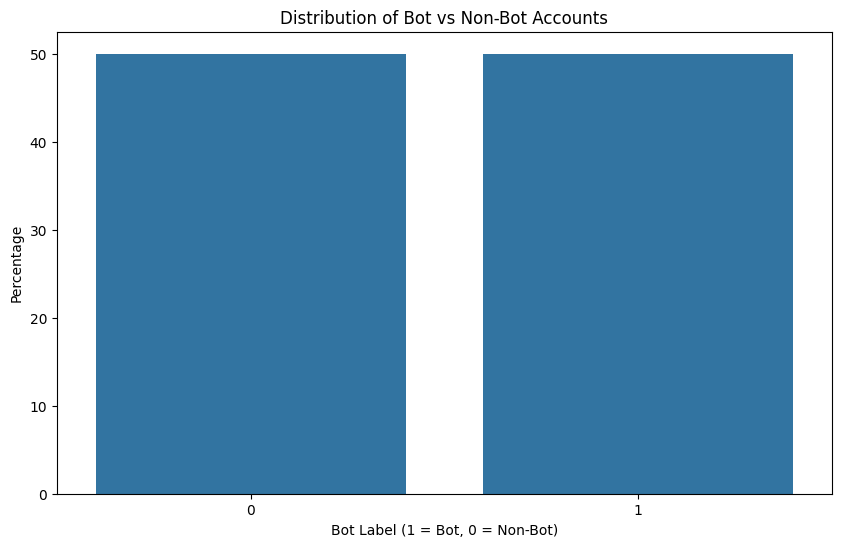

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
bot_dist = df['Bot Label'].value_counts(normalize=True) * 100
sns.barplot(x=bot_dist.index, y=bot_dist.values)
plt.title('Distribution of Bot vs Non-Bot Accounts')
plt.xlabel('Bot Label (1 = Bot, 0 = Non-Bot)')
plt.ylabel('Percentage')
plt.show()

<Figure size 1200x500 with 0 Axes>

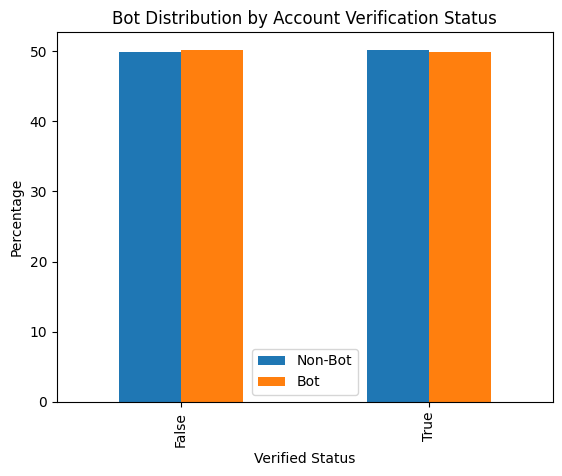

In [6]:
plt.figure(figsize=(12, 5))
verified_bot = pd.crosstab(df['Verified'], df['Bot Label'], normalize='index') * 100
verified_bot.plot(kind='bar')
plt.title('Bot Distribution by Account Verification Status')
plt.xlabel('Verified Status')
plt.ylabel('Percentage')
plt.legend(['Non-Bot', 'Bot'])
plt.show()

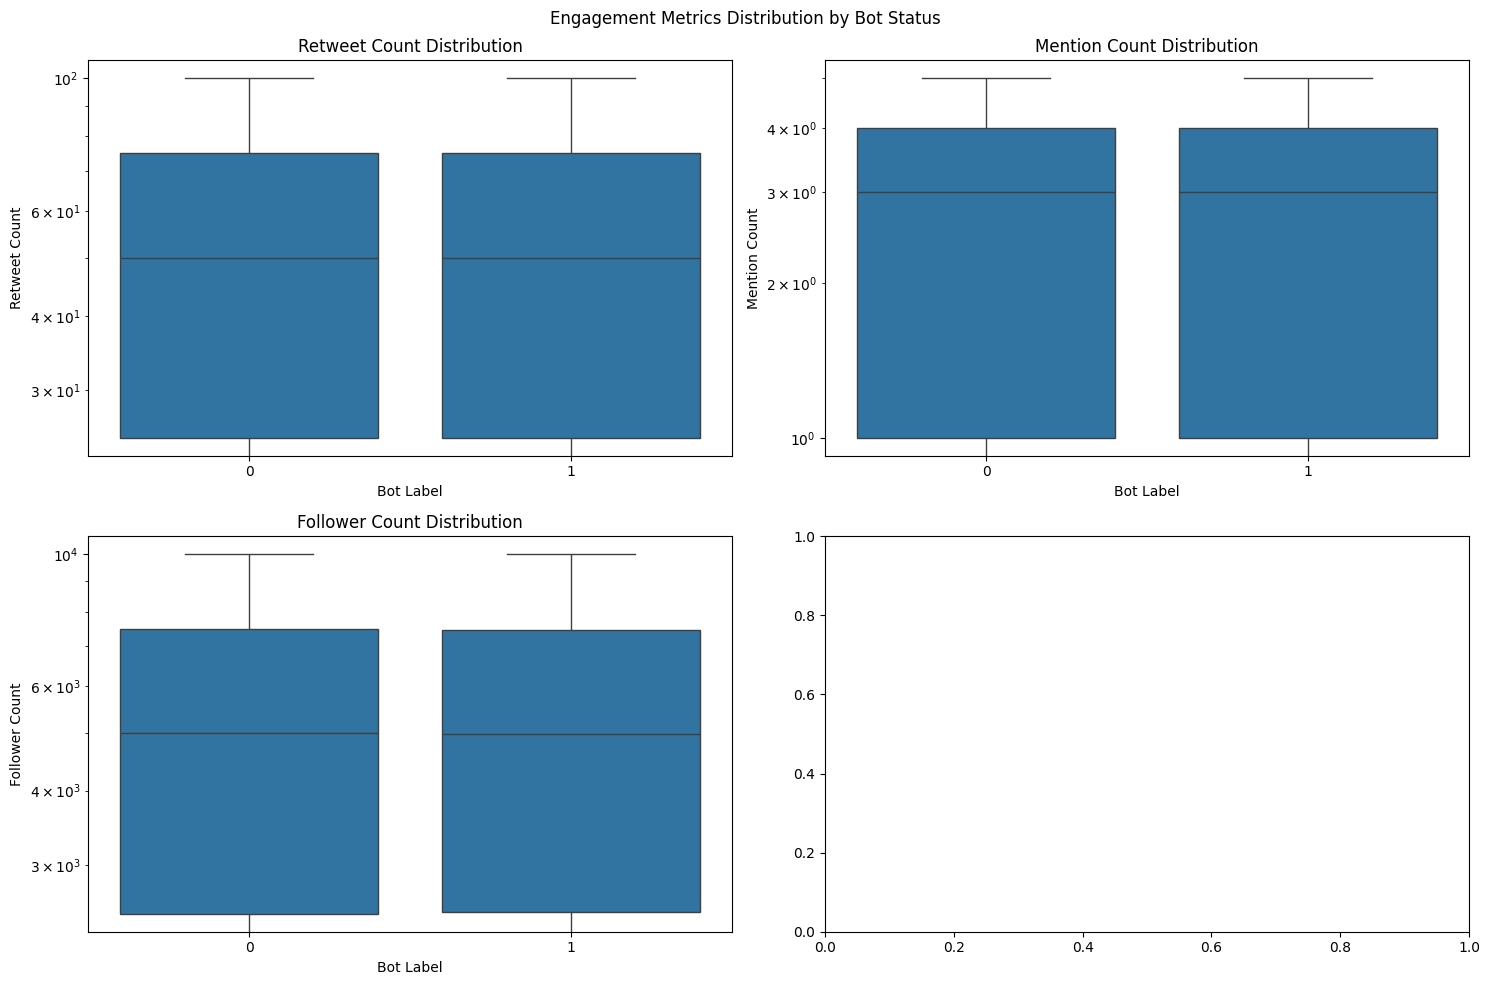

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Engagement Metrics Distribution by Bot Status')

metrics = ['Retweet Count', 'Mention Count', 'Follower Count']
for i, metric in enumerate(metrics):
    ax = axes[i//2, i%2]
    sns.boxplot(x='Bot Label', y=metric, data=df, ax=ax)
    ax.set_title(f'{metric} Distribution')
    ax.set_yscale('log')

plt.tight_layout()
plt.show()

In [8]:
df.groupby('Bot Label')[metrics].agg(['mean', 'median'])

Retweet Count        Mention Count        Follower Count        
                   mean median          mean median           mean  median
Bot Label                                                                 
0             49.969098   50.0      2.525578    3.0    4985.255664  5007.5
1             50.042050   50.0      2.501959    3.0    4991.944280  4978.0

<Figure size 1200x600 with 0 Axes>

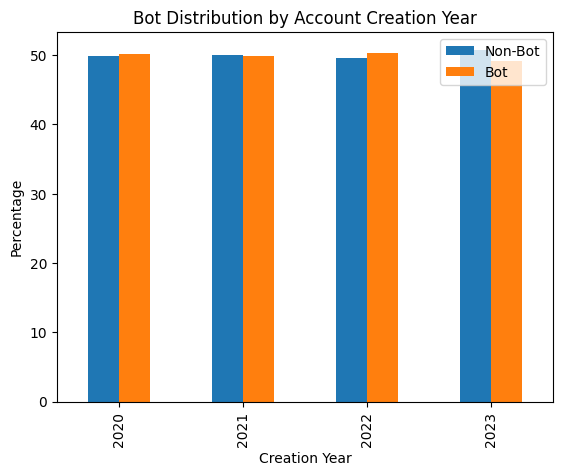

In [9]:
df['Created At'] = pd.to_datetime(df['Created At'])
df['Creation Year'] = df['Created At'].dt.year

plt.figure(figsize=(12, 6))
creation_year_bot = pd.crosstab(df['Creation Year'], df['Bot Label'], normalize='index') * 100
creation_year_bot.plot(kind='bar')
plt.title('Bot Distribution by Account Creation Year')
plt.xlabel('Creation Year')
plt.ylabel('Percentage')
plt.legend(['Non-Bot', 'Bot'])
plt.show()

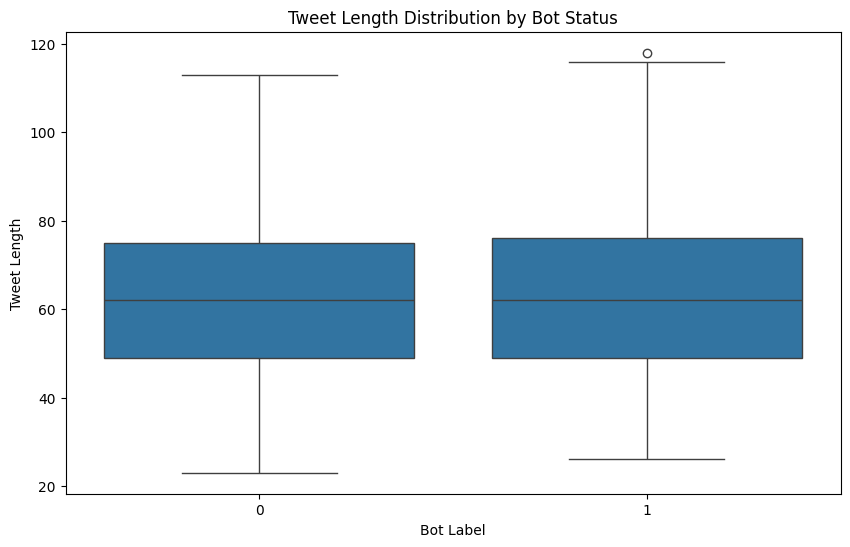

=== Tweet Length Statistics ===
             count       mean        std   min   25%   50%   75%    max
Bot Label                                                              
0          24982.0  62.612601  16.396708  23.0  49.0  62.0  75.0  113.0
1          25018.0  62.642058  16.546247  26.0  49.0  62.0  76.0  118.0


In [10]:
df['Tweet Length'] = df['Tweet'].str.len()
        
plt.figure(figsize=(10, 6))
sns.boxplot(x='Bot Label', y='Tweet Length', data=df)
plt.title('Tweet Length Distribution by Bot Status')
plt.show()

print("=== Tweet Length Statistics ===")
print(df.groupby('Bot Label')['Tweet Length'].describe())

Tweet Length Statistics:
count    50000.000000
mean        62.627340
std         16.471543
min         23.000000
25%         49.000000
50%         62.000000
75%         76.000000
max        118.000000
Name: tweet_length, dtype: float64

Word Count Statistics:
count    50000.000000
mean         9.571200
std          2.329463
min          6.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         14.000000
Name: word_count, dtype: float64


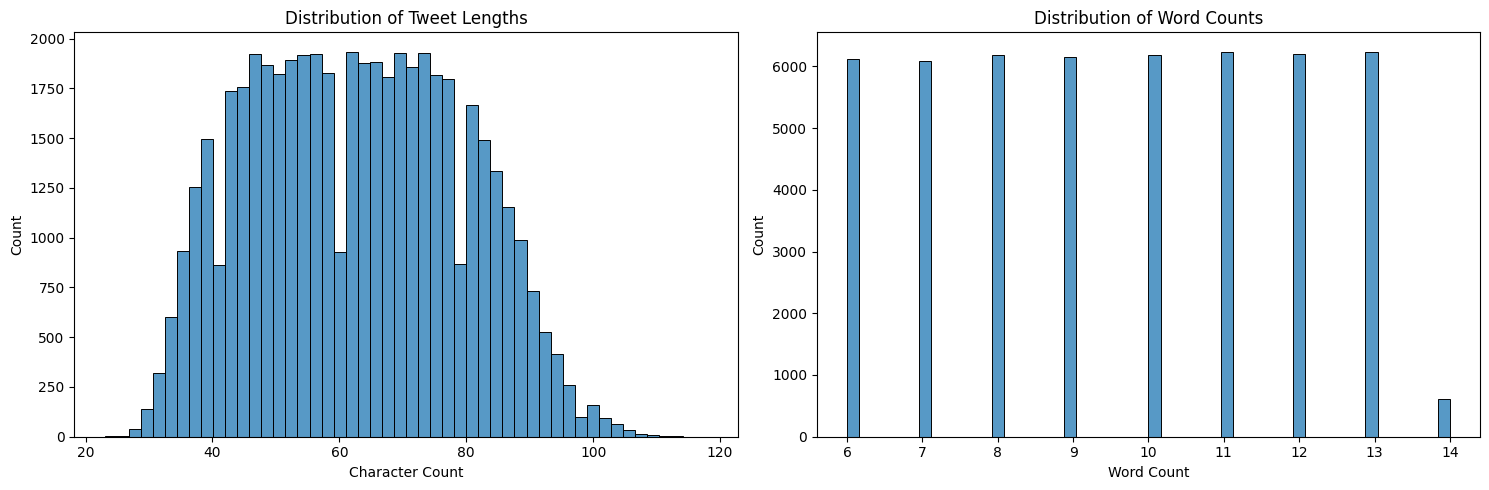

In [11]:
df['tweet_length'] = df['Tweet'].str.len()
df['word_count'] = df['Tweet'].str.split().str.len()

print("Tweet Length Statistics:")
print(df['tweet_length'].describe())
print("\nWord Count Statistics:")
print(df['word_count'].describe())

# Visualize distributions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data=df, x='tweet_length', bins=50, ax=ax1)
ax1.set_title('Distribution of Tweet Lengths')
ax1.set_xlabel('Character Count')

sns.histplot(data=df, x='word_count', bins=50, ax=ax2)
ax2.set_title('Distribution of Word Counts')
ax2.set_xlabel('Word Count')

plt.tight_layout()
plt.show()

In [12]:
import string

df['urls_count'] = df['Tweet'].str.count(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
df['mentions_count'] = df['Tweet'].str.count(r'@\w+')
df['hashtags_count'] = df['Tweet'].str.count(r'#\w+')
df['numbers_count'] = df['Tweet'].str.count(r'\d+')
df['punct_count'] = df['Tweet'].apply(lambda x: sum(1 for c in str(x) if c in string.punctuation))

pattern_stats = pd.DataFrame({
    'Pattern': ['URLs', 'Mentions', 'Hashtags', 'Numbers', 'Punctuation'],
    'Average per Tweet': [
        df['urls_count'].mean(),
        df['mentions_count'].mean(),
        df['hashtags_count'].mean(),
        df['numbers_count'].mean(),
        df['punct_count'].mean()
    ],
    'Tweets with Pattern (%)': [
        (df['urls_count'] > 0).mean() * 100,
        (df['mentions_count'] > 0).mean() * 100,
        (df['hashtags_count'] > 0).mean() * 100,
        (df['numbers_count'] > 0).mean() * 100,
        (df['punct_count'] > 0).mean() * 100
    ]
})

pattern_stats.round(2)

,Pattern,Average per Tweet,Tweets with Pattern (%)
0,URLs,0.0,0.0
1,Mentions,0.0,0.0
2,Hashtags,0.0,0.0
3,Numbers,0.0,0.0
4,Punctuation,1.0,100.0


Sentiment Analysis (sample):
Average sentiment polarity: 0.087
Positive tweets: 49.9%
Negative tweets: 21.8%
Neutral tweets: 28.3%


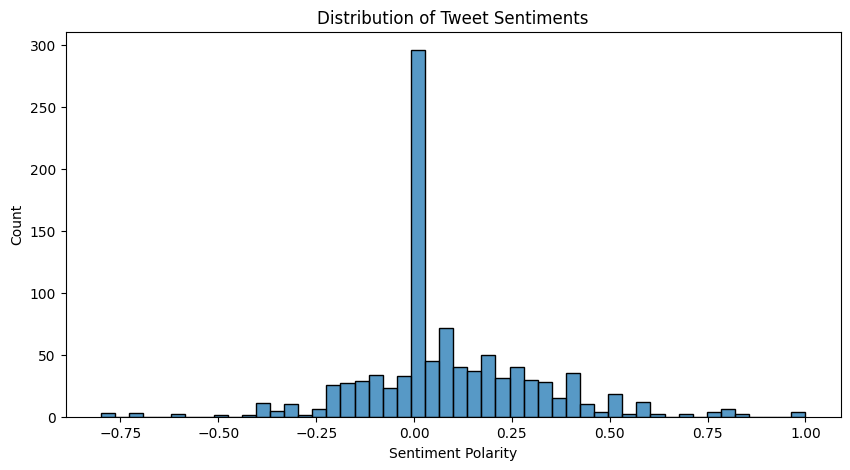

In [13]:
from textblob import TextBlob
import numpy as np

sample_size = min(1000, len(df))
sample_tweets = df['Tweet'].sample(n=sample_size, random_state=42)

sentiments = []
for tweet in sample_tweets:
    try:
        sentiment = TextBlob(tweet).sentiment.polarity
        sentiments.append(sentiment)
    except:
        sentiments.append(0)

print("Sentiment Analysis (sample):")
print(f"Average sentiment polarity: {np.mean(sentiments):.3f}")
print(f"Positive tweets: {sum(s > 0 for s in sentiments) / len(sentiments):.1%}")
print(f"Negative tweets: {sum(s < 0 for s in sentiments) / len(sentiments):.1%}")
print(f"Neutral tweets: {sum(s == 0 for s in sentiments) / len(sentiments):.1%}")

# Visualize sentiment distribution
plt.figure(figsize=(10, 5))
sns.histplot(sentiments, bins=50)
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment Polarity')
plt.show()

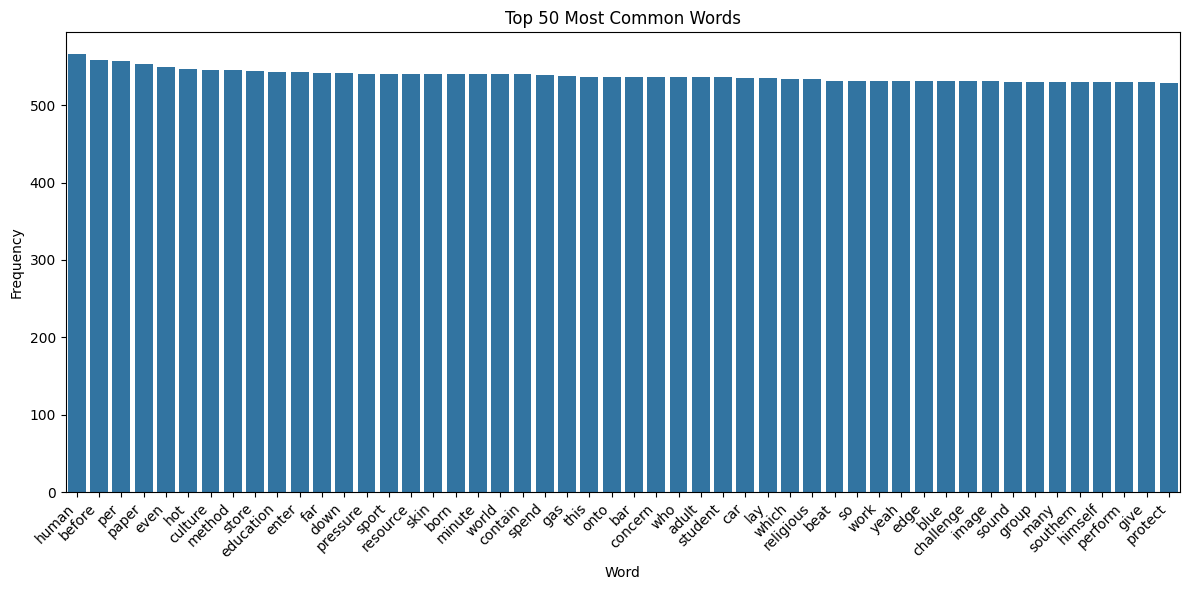

In [14]:
import re
from collections import Counter
from nltk.tokenize import word_tokenize

all_words = ' '.join(df['Tweet'].fillna('')).lower()
all_words = re.sub(r'http\S+|www.\S+', '', all_words)  # Remove URLs
all_words = re.sub(r'@\w+', '', all_words)  # Remove mentions
all_words = re.sub(r'#\w+', '', all_words)  # Remove hashtags

# Basic stopwords
stopwords = set(['the', 'to', 'and', 'a', 'in', 'is', 'it', 'you', 'that', 'of', 'for'])

# Count words
words = word_tokenize(all_words)
word_freq = Counter(word for word in words 
                    if word.isalnum() and 
                    word not in stopwords and 
                    len(word) > 1)

# Plot top words
top_words = pd.DataFrame(word_freq.most_common(50), 
                        columns=['Word', 'Frequency'])

plt.figure(figsize=(12, 6))
sns.barplot(data=top_words, x='Word', y='Frequency')
plt.xticks(rotation=45, ha='right')
plt.title(f'Top {50} Most Common Words')
plt.tight_layout()
plt.show()

In [15]:
df['starts_with_symbol'] = df['Tweet'].apply(
    lambda x: bool(re.match(r'^[^\w\s]', str(x)))
)
df['ends_with_symbol'] = df['Tweet'].apply(
    lambda x: bool(re.search(r'[^\w\s]$', str(x)))
)

position_stats = pd.DataFrame({
    'Position': ['Start', 'End'],
    'Tweets with Symbol (%)': [
        df['starts_with_symbol'].mean() * 100,
        df['ends_with_symbol'].mean() * 100
    ]
})

print("Symbol Position Statistics:")
print(position_stats.round(2))

# Compare between bots and non-bots
position_by_bot = pd.DataFrame({
    'Starts with Symbol (%)': [
        df[df['Bot Label'] == 0]['starts_with_symbol'].mean() * 100,
        df[df['Bot Label'] == 1]['starts_with_symbol'].mean() * 100
    ],
    'Ends with Symbol (%)': [
        df[df['Bot Label'] == 0]['ends_with_symbol'].mean() * 100,
        df[df['Bot Label'] == 1]['ends_with_symbol'].mean() * 100
    ]
}, index=['Non-Bot', 'Bot'])

print("\nSymbol Position by Bot Status:")
position_by_bot.round(2)

Symbol Position Statistics:
  Position  Tweets with Symbol (%)
0    Start                     0.0
1      End                   100.0

Symbol Position by Bot Status:


,Starts with Symbol (%),Ends with Symbol (%)
Non-Bot,0.0,100.0
Bot,0.0,100.0


In [19]:
df['punctuation'] = df['Tweet'].apply(lambda x: len(re.findall(r'[,.!?;:"\']', str(x))))
df['brackets'] = df['Tweet'].apply(lambda x: len(re.findall(r'[\[\](){}<>]', str(x))))
df['currency_symbols'] = df['Tweet'].apply(lambda x: len(re.findall(r'[$€£¥₹]', str(x))))
df['slashes'] = df['Tweet'].apply(lambda x: len(re.findall(r'[/\\]', str(x))))

# Calculate statistics
symbol_stats = pd.DataFrame({
    'Category': ['Punctuation', 'Brackets',  
                'Currency Symbols', 'Slashes'],
    'Average per Tweet': [
        df['punctuation'].mean(),
        df['brackets'].mean(),
        df['currency_symbols'].mean(),
        df['slashes'].mean()
    ],
    'Tweets with Symbol (%)': [
        (df['punctuation'] > 0).mean() * 100,
        (df['brackets'] > 0).mean() * 100,
        (df['currency_symbols'] > 0).mean() * 100,
        (df['slashes'] > 0).mean() * 100
    ]
})

print("Symbol Category Statistics:")
symbol_stats.round(2)

Symbol Category Statistics:


,Category,Average per Tweet,Tweets with Symbol (%)
0,Punctuation,1.0,100.0
1,Brackets,0.0,0.0
2,Currency Symbols,0.0,0.0
3,Slashes,0.0,0.0


In [20]:
df['exclamations'] = df['Tweet'].apply(lambda x: str(x).count('!'))
df['questions'] = df['Tweet'].apply(lambda x: str(x).count('?'))
df['periods'] = df['Tweet'].apply(lambda x: str(x).count('.'))
df['commas'] = df['Tweet'].apply(lambda x: str(x).count(','))
df['semicolons'] = df['Tweet'].apply(lambda x: str(x).count(';'))
df['colons'] = df['Tweet'].apply(lambda x: str(x).count(':'))

punct_stats = pd.DataFrame({
    'Mark': ['!', '?', '.', ',', ';', ':'],
    'Average per Tweet': [
        df['exclamations'].mean(),
        df['questions'].mean(),
        df['periods'].mean(),
        df['commas'].mean(),
        df['semicolons'].mean(),
        df['colons'].mean()
    ],
    'Tweets with Mark (%)': [
        (df['exclamations'] > 0).mean() * 100,
        (df['questions'] > 0).mean() * 100,
        (df['periods'] > 0).mean() * 100,
        (df['commas'] > 0).mean() * 100,
        (df['semicolons'] > 0).mean() * 100,
        (df['colons'] > 0).mean() * 100
    ]
})

print("\nPunctuation Statistics:")
punct_stats.round(2)


Punctuation Statistics:


,Mark,Average per Tweet,Tweets with Mark (%)
0,!,0.0,0.0
1,?,0.0,0.0
2,.,1.0,100.0
3,",",0.0,0.0
4,;,0.0,0.0
5,:,0.0,0.0



Symbol Density Statistics:
count    50000.000
mean         0.111
std          0.029
min          0.071
25%          0.083
50%          0.100
75%          0.125
max          0.167
Name: symbol_density, dtype: float64


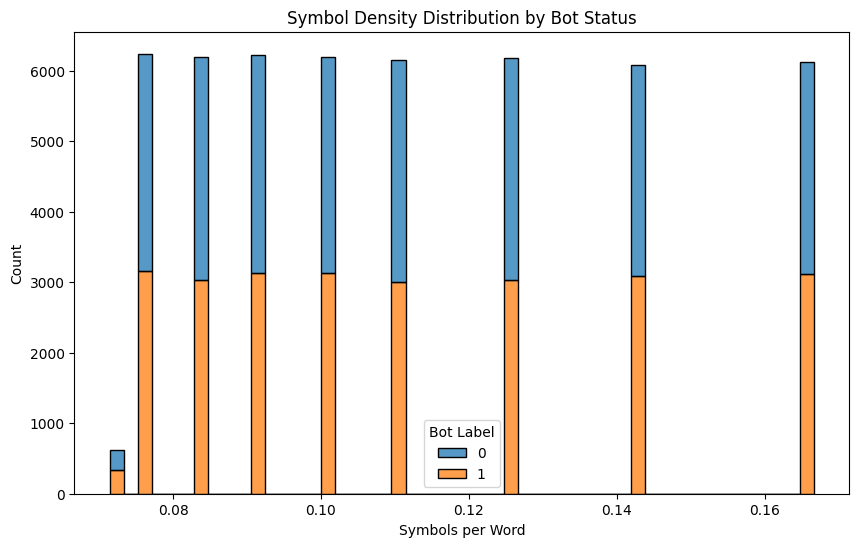

count    50000.000000
mean         0.111401
std          0.029171
min          0.071429
25%          0.083333
50%          0.100000
75%          0.125000
max          0.166667
Name: symbol_density, dtype: float64

In [27]:
df['total_symbols'] = (df['punctuation'] + df['brackets'] + 
                            + df['currency_symbols'] +  df['slashes'])
        
# Calculate symbol density (symbols per word)
df['word_count'] = df['Tweet'].str.split().str.len()
df['symbol_density'] = df['total_symbols'] / df['word_count'].replace(0, 1)

print("\nSymbol Density Statistics:")
print(df['symbol_density'].describe().round(3))

# Visualize density distribution by bot status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='symbol_density', hue='Bot Label', 
            multiple="stack", bins=50)
plt.title('Symbol Density Distribution by Bot Status')
plt.xlabel('Symbols per Word')
plt.show()

df['symbol_density'].describe()